In [0]:

import numpy as np
#from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

from scipy.spatial.distance import cosine

import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import wordnet
import nltk
from scipy.sparse import coo_matrix
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
df=pd.read_csv('/content/drive/My Drive/all-weights.csv')
#df=pd.read_csv('/content/drive/My Drive/application_data_10000.csv')

In [0]:

df.shape


(1689, 8070)

In [0]:
df=df[df['TOPIC']>0]

In [0]:
h=df.columns
for i in range(len(h)):
  if not isEnglish(h[i]):
    df.drop(h[i],  axis=1, inplace=True)
 

In [0]:
data=df.drop('TOPIC',  axis=1)


In [0]:
df = df[(df.T != 0).any()]
data=df

In [0]:
M=data.values
M.shape

(1689, 7971)

In [0]:
sp= coo_matrix((M, M.shape), shape=M.shape)

TypeError: ignored

In [0]:
dis =euclidean_distances(M)
dis[100][150]


458262.3360884571

In [0]:
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=10, eps=1e-9, random_state=seed,  dissimilarity="precomputed", n_jobs=1, verbose=1)


In [0]:
pos = mds.fit(dis).embedding_

it: 0, stress 1.6317367268832487e+19
it: 1, stress 4.5301192741774013e+18
it: 2, stress 2.9131140102366756e+18
it: 3, stress 2.5698013485043343e+18
it: 4, stress 2.4581121923322045e+18
it: 5, stress 2.41570529888195e+18
it: 6, stress 2.3966414997198234e+18
it: 7, stress 2.3878240728932895e+18
it: 8, stress 2.3825569823125796e+18
it: 9, stress 2.377979172935913e+18
it: 0, stress 1.6317367306194522e+19
it: 1, stress 4.642031024416078e+18
it: 2, stress 2.9921643942654244e+18
it: 3, stress 2.589946366857419e+18
it: 4, stress 2.4648501651042376e+18
it: 5, stress 2.4178185852702085e+18
it: 6, stress 2.399172644860266e+18
it: 7, stress 2.391274270780423e+18
it: 8, stress 2.387313461287187e+18
it: 9, stress 2.384925433622719e+18
it: 0, stress 1.6317367361604786e+19
it: 1, stress 4.5926167766200177e+18
it: 2, stress 2.998195188038179e+18
it: 3, stress 2.6028376080323845e+18
it: 4, stress 2.461901114546673e+18
it: 5, stress 2.4162445562634317e+18
it: 6, stress 2.3969306181967514e+18
it: 7, stres

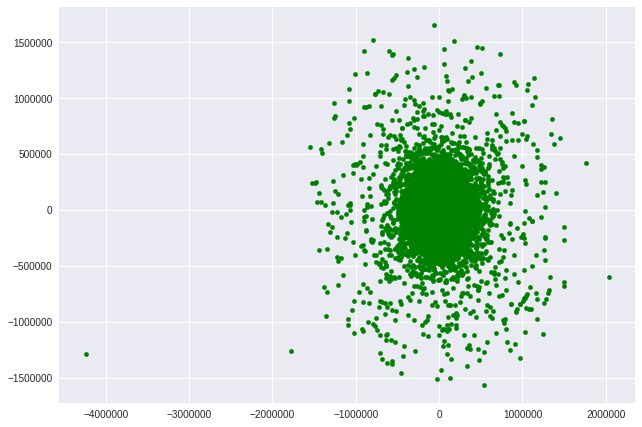

In [0]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])
plt.scatter(pos[:, 0], pos[:, 1], s=20, c='g')
plt.show()

In [0]:
df['TOPIC'].unique()

array([2, 1])

In [0]:
c=df['TOPIC']
c=c.replace(0,'w')
c=c.replace(1,'g')
c=c.replace(2,'b')

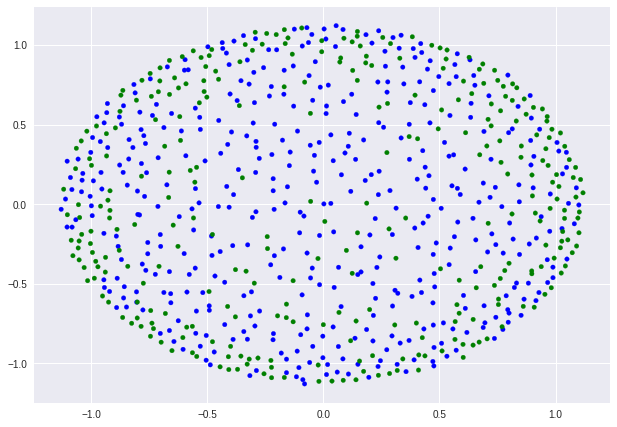

In [0]:

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])
plt.scatter(pos[:, 0], pos[:, 1], s=20, c=c)
plt.show()

In [0]:
df.shape

(1242, 7971)

In [0]:
df.dropna()
similarities= df.values 
similarities=similarities.transpose()
similarities.shape

(7971, 1689)

In [0]:
similarities[~(similarities==0).all(1)]

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
dis = euclidean_distances(similarities)
dis.shape
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=20, eps=1e-9, random_state=seed,  dissimilarity="precomputed", n_jobs=1, verbose=3)
pos = mds.fit(dis).embedding_
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])
plt.scatter(pos[:, 0], pos[:, 1], s=20, c='g')
plt.show()

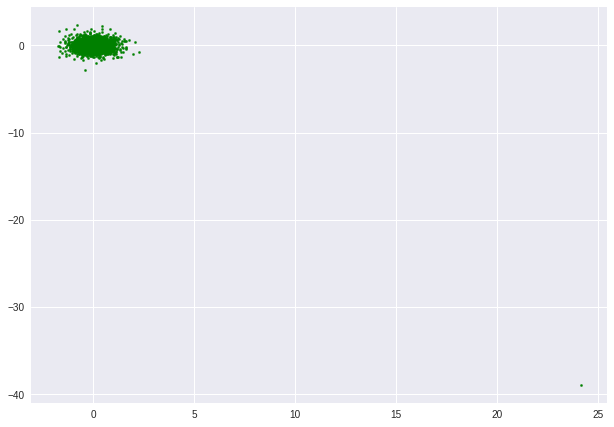

In [0]:

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])
plt.scatter(pos[:, 0], pos[:, 1], s=5, c='g')
plt.show()

In [0]:
a = np.array([[1, 2], [3, 4]])
a=1/a
a

array([[1.        , 0.5       ],
       [0.33333333, 0.25      ]])